# Elipses de covarianza

In [1]:
import math
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

Importar la librería danatools

In [2]:
import danatools

## Parámetros de la distribución normal bivariada

In [3]:
mu1 = 0
mu2 = 0
sigma1 = 1

In [4]:
# Sin correlación y σ₂ = σ₁
sigma2 = sigma1
rho = 0

In [5]:
# Sin correlación y σ₂ = σ₁/2
# sigma2 = sigma1 / 2
# rho = 0

In [6]:
# Correlación positiva
# sigma2 = sigma1
# rho = 0.95

In [7]:
# Correlación negativa
# sigma2 = sigma1
# rho = -0.95

Parámetro μ en notación vectorial

In [8]:
mu = np.array([mu1, mu2])
mu

array([0, 0])

Matriz de covarianza

In [9]:
var1 = sigma1**2
var2 = sigma2**2
cova12 = rho*sigma1*sigma2

In [10]:
cova = np.array([[var1, cova12],
                 [cova12, var2]])
print(cova)

[[1 0]
 [0 1]]


## Diagonalización de la matriz de covarianza

In [11]:
autovalores, autovectores = la.eigh(cova)
autovectores

array([[1., 0.],
       [0., 1.]])

In [12]:
autovector1 = autovectores[:,0]
autovalor1 = autovalores[0]
print(f"autovector1: {autovector1}")
print(f"autovalor1: {autovalor1}")

autovector1: [1. 0.]
autovalor1: 1.0


In [13]:
autovalor2 = autovalores[1]
autovector2 = autovectores[:,1]
print(f"autovector2: {autovector2}")
print(f"autovalor2: {autovalor2}")

autovector2: [0. 1.]
autovalor2: 1.0


## Elipse 1$\sigma$

(-1.1002198080833183,
 1.1047247527658723,
 -1.1002237020200274,
 1.10472493819143)

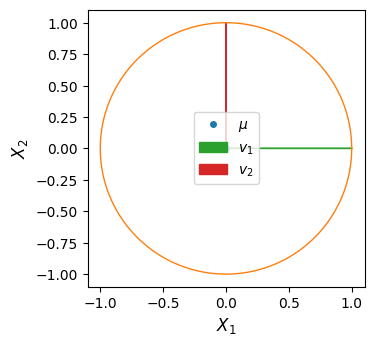

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax1.plot(mu1, mu2, marker='o', ls='', label='$\mu$')
x_1sigma, y_1sigma = danatools.get_ellipse(mu, cova, nsigma=1)
ax1.plot(x_1sigma, y_1sigma)
ax1.arrow(mu1, mu2, autovalor1*autovector1[0], autovalor1*autovector1[1], color='tab:green', label='$v_1$')
ax1.arrow(mu1, mu2, autovalor2*autovector2[0], autovalor2*autovector2[1], color='tab:red', label='$v_2$')
ax1.legend()
plt.axis('scaled')        # igual escala en los dos ejes 

## Elipses 1, 2 y 3 $\sigma$

(-3.2999844242499545,
 3.2999992582976168,
 -3.2999959206343714,
 3.2999959206343714)

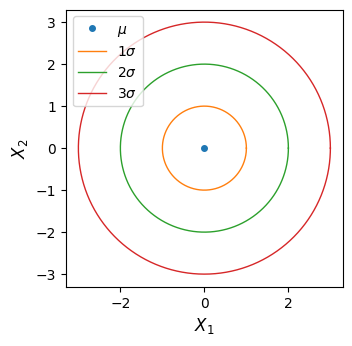

In [15]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
ax2.plot(mu1, mu2, marker='o', ls='', label='$\mu$')
x_1sigma, y_1sigma= danatools.get_ellipse(mu, cova, nsigma=1)
ax2.plot(x_1sigma, y_1sigma, label='$1\sigma$')
x_2sigma, y_2sigma = danatools.get_ellipse(mu, cova, nsigma=2)
ax2.plot(x_2sigma, y_2sigma, label='$2\sigma$')
x_3sigma, y_3sigma = danatools.get_ellipse(mu, cova, nsigma=3)
ax2.plot(x_3sigma, y_3sigma, label='$3\sigma$')
ax2.legend()
plt.axis('scaled')